In [2]:
import sys
from pathlib import Path

# Add project root to Python path
PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

print("Project root added:", PROJECT_ROOT)


Project root added: /Users/diegomikael/drawdown-risk-analysis


In [3]:
import pandas as pd
from src.data import fetch_adj_close
from src.risk import extract_drawdown_events

In [4]:
prices = fetch_adj_close()

all_events = []
summary_rows = []

for ticker in prices.columns:
    s = prices[ticker].dropna()
    events = extract_drawdown_events(s)
    events["ticker"] = ticker
    all_events.append(events)

    if events.empty:
        summary_rows.append({
            "ticker": ticker,
            "n_events": 0,
            "worst_depth": None,
            "longest_total_days": None,
            "avg_depth": None,
        })
        continue

    summary_rows.append({
        "ticker": ticker,
        "n_events": int(len(events)),
        "worst_depth": float(events["depth"].min()),
        "longest_total_days": float(
            events.loc[events["recovered"], "total_days"].max()
        ),
        "avg_depth": float(events["depth"].mean()),
    })

events_all = pd.concat(all_events, ignore_index=True)
summary = pd.DataFrame(summary_rows).sort_values("worst_depth")

summary


Failed to get ticker 'GLD' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'TLT' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'QQQ' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'IWM' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'SPY' reason: Expecting value: line 1 column 1 (char 0)

5 Failed downloads:
['GLD', 'TLT', 'QQQ', 'IWM', 'SPY']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


,ticker,n_events,worst_depth,longest_total_days,avg_depth
2,IWM,140,-0.598941,1388.0,-0.037310
0,SPY,294,-0.564733,1935.0,-0.017727
1,QQQ,266,-0.534020,1136.0,-0.027225
3,TLT,49,-0.483507,1089.0,-0.054905
4,GLD,120,-0.455550,3264.0,-0.029637


In [5]:
from pathlib import Path

Path("outputs").mkdir(exist_ok=True)

summary.to_csv("outputs/summary_by_asset.csv", index=False)
events_all.to_csv("outputs/drawdown_events_all.csv", index=False)
prices.to_csv("outputs/prices_used.csv")


Matplotlib is building the font cache; this may take a moment.


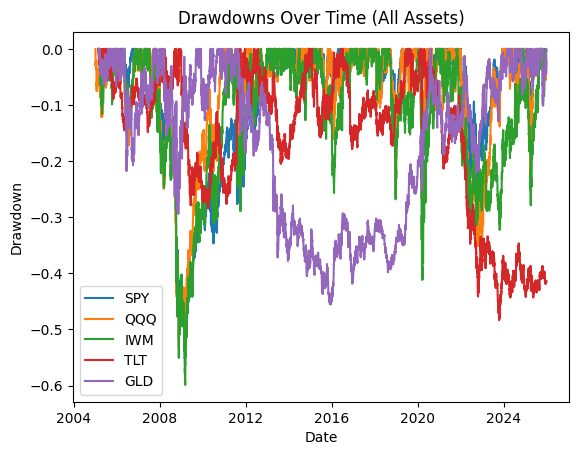

In [6]:
import matplotlib.pyplot as plt
from src.risk import compute_drawdown

plt.figure()

for ticker in prices.columns:
    dd = compute_drawdown(prices[ticker].dropna())
    plt.plot(dd.index, dd["drawdown"], label=ticker)

plt.title("Drawdowns Over Time (All Assets)")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend()
plt.show()


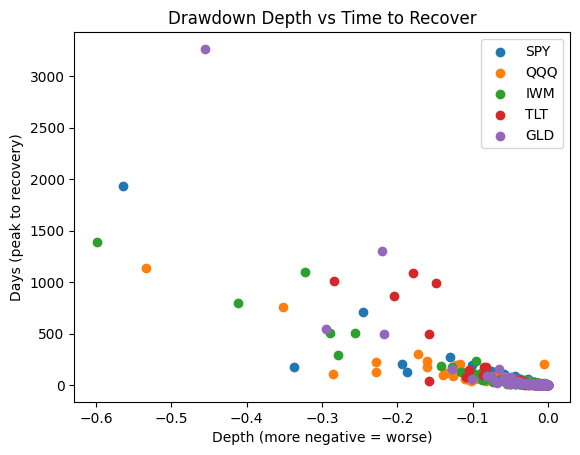

In [7]:
import matplotlib.pyplot as plt

recovered = events_all[events_all["recovered"] == True].copy()

plt.figure()
for ticker in recovered["ticker"].unique():
    sub = recovered[recovered["ticker"] == ticker]
    plt.scatter(sub["depth"], sub["total_days"], label=ticker)

plt.title("Drawdown Depth vs Time to Recover")
plt.xlabel("Depth (more negative = worse)")
plt.ylabel("Days (peak to recovery)")
plt.legend()
plt.show()


In [8]:
worst5_each = (
    events_all.sort_values("depth")
    .groupby("ticker")
    .head(5)
    .loc[:, ["ticker", "peak_date", "trough_date", "recovery_date", "depth", "total_days"]]
)

worst5_each


,ticker,peak_date,trough_date,recovery_date,depth,total_days
594,IWM,2007-07-09,2009-03-09,2011-04-27,-0.598941,1388.0
42,SPY,2007-10-09,2009-03-09,2013-01-25,-0.564733,1935.0
320,QQQ,2007-10-31,2008-11-20,2010-12-10,-0.534020,1136.0
748,TLT,2020-08-04,2023-10-19,NaT,-0.483507,NaN
825,GLD,2011-08-22,2015-12-17,2020-07-29,-0.455550,3264.0
674,IWM,2018-08-31,2020-03-23,2020-11-09,-0.411324,801.0
522,QQQ,2021-11-19,2022-11-03,2023-12-13,-0.351197,754.0
191,SPY,2020-02-19,2020-03-23,2020-08-10,-0.337154,173.0
692,IWM,2021-11-08,2023-10-27,2024-11-11,-0.322669,1099.0
795,GLD,2008-03-17,2008-11-12,2009-09-16,-0.294141,548.0


In [9]:
worst5_each.to_csv("outputs/worst5_events_by_asset.csv", index=False)


In [10]:
from pathlib import Path

# Create outputs folder if it doesn't exist
Path("outputs").mkdir(exist_ok=True)

summary.to_csv("outputs/summary_by_asset.csv", index=False)
events_all.to_csv("outputs/drawdown_events_all.csv", index=False)
prices.to_csv("outputs/prices_used.csv")

print("Saved outputs/")


Saved outputs/


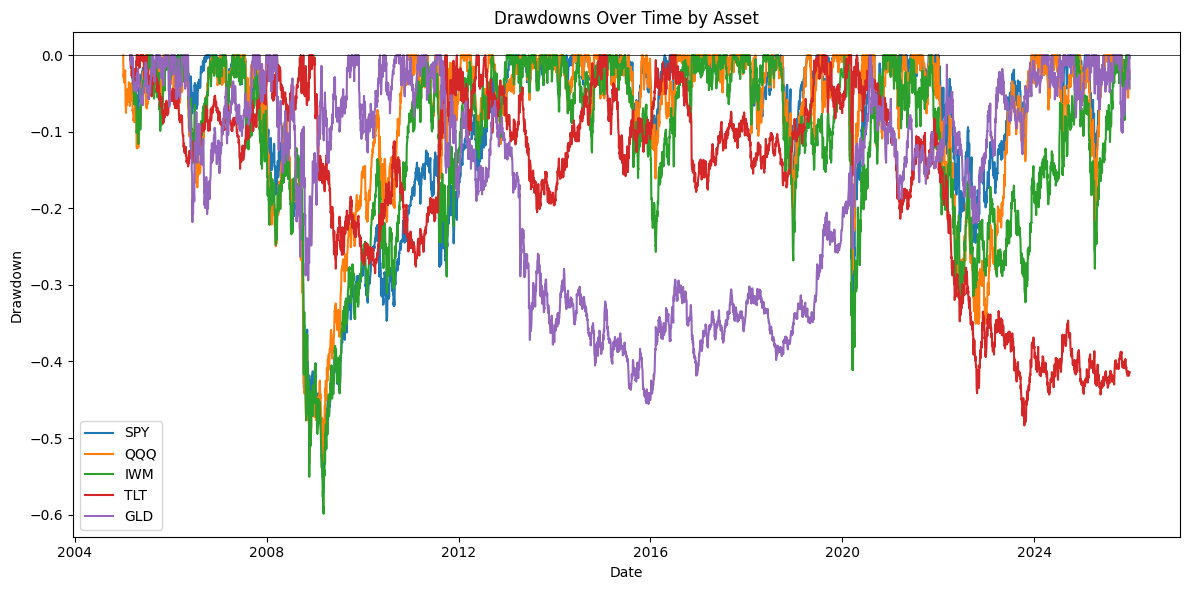

In [11]:
import matplotlib.pyplot as plt
from src.risk import compute_drawdown

plt.figure(figsize=(12, 6))

for ticker in prices.columns:
    dd = compute_drawdown(prices[ticker].dropna())
    plt.plot(dd.index, dd["drawdown"], label=ticker)

plt.axhline(0, color="black", linewidth=0.5)
plt.title("Drawdowns Over Time by Asset")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
plt.savefig("outputs/drawdowns_over_time.png", dpi=150)


<Figure size 640x480 with 0 Axes>

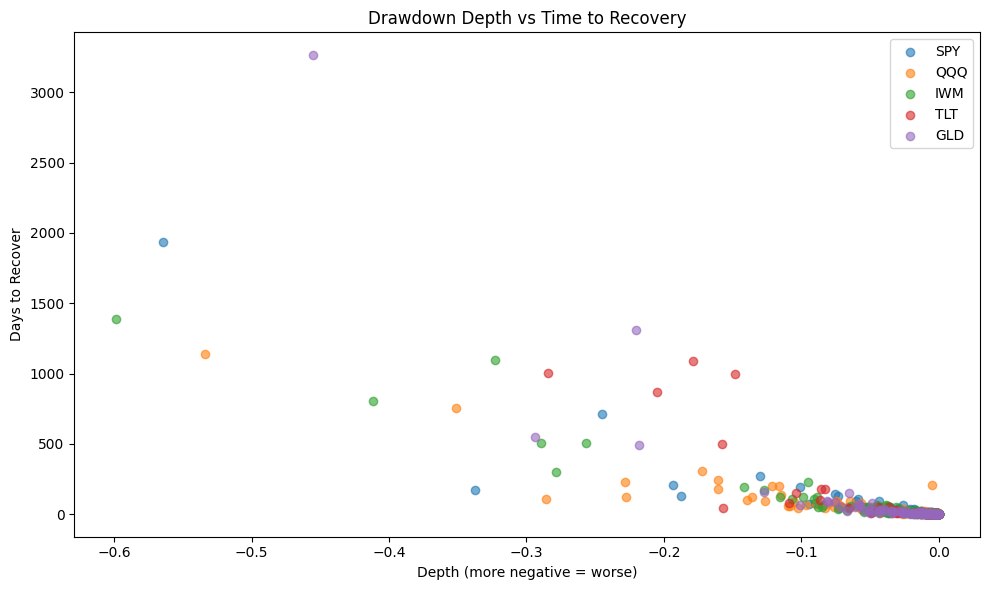

In [13]:
plt.figure(figsize=(10, 6))

recovered = events_all[events_all["recovered"] == True]

for ticker in recovered["ticker"].unique():
    sub = recovered[recovered["ticker"] == ticker]
    plt.scatter(
        sub["depth"],
        sub["total_days"],
        label=ticker,
        alpha=0.6
    )

plt.title("Drawdown Depth vs Time to Recovery")
plt.xlabel("Depth (more negative = worse)")
plt.ylabel("Days to Recover")
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
plt.savefig("outputs/depth_vs_recovery.png", dpi=150)


<Figure size 640x480 with 0 Axes>

In [15]:
events_all.groupby("ticker")["total_days"].median().sort_values()


ticker
GLD    5.0
QQQ    6.0
SPY    6.0
IWM    7.0
TLT    8.0
Name: total_days, dtype: float64

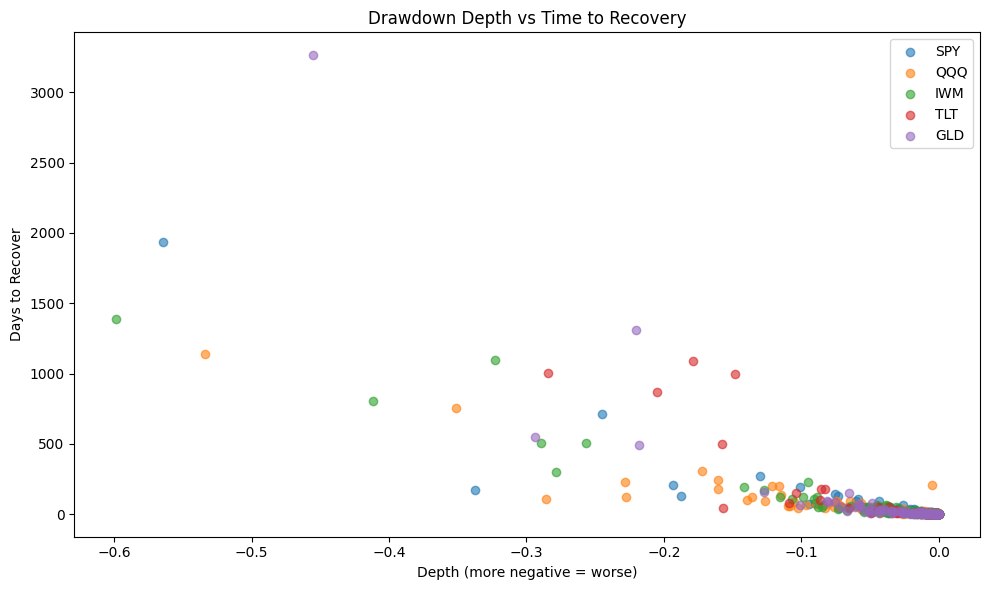

In [16]:
plt.figure(figsize=(10, 6))

for ticker in recovered["ticker"].unique():
    sub = recovered[recovered["ticker"] == ticker]
    plt.scatter(sub["depth"], sub["total_days"], label=ticker, alpha=0.6)

plt.title("Drawdown Depth vs Time to Recovery")
plt.xlabel("Depth (more negative = worse)")
plt.ylabel("Days to Recover")
plt.legend()
plt.tight_layout()

plt.savefig("outputs/depth_vs_recovery.png", dpi=150)
plt.show()


In [17]:
from pathlib import Path

ROOT = Path.cwd().parent          # project root (because notebook is in /notebooks)
OUT = ROOT / "outputs"
OUT.mkdir(exist_ok=True)

plt.savefig(OUT / "depth_vs_recovery.png", dpi=150)


<Figure size 640x480 with 0 Axes>

In [21]:
from pathlib import Path

ROOT = Path.cwd().parent          # project root (because notebook is in /notebooks)
OUT = ROOT / "outputs"
OUT.mkdir(exist_ok=True)

plt.savefig(OUT / "depth_vs_recovery.png", dpi=150)


<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
from src.risk import compute_drawdown
from pathlib import Path

# Ensure figures folder exists at project root
ROOT = Path.cwd().parent
FIGURES = ROOT / "figures"
FIGURES.mkdir(exist_ok=True)

plt.figure(figsize=(12, 6))

for ticker in prices.columns:
    dd = compute_drawdown(prices[ticker].dropna())
    plt.plot(dd.index, dd["drawdown"], label=ticker)

plt.axhline(0, color="black", linewidth=0.5)
plt.title("Drawdowns Over Time by Asset")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend()
plt.tight_layout()

plt.savefig(FIGURES / "drawdowns_over_time.png", dpi=150)
plt.close()


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.data import fetch_adj_close
from src.risk import extract_drawdown_events


In [27]:
prices = fetch_adj_close()
returns = prices.pct_change(fill_method=None).dropna()


Failed to get ticker 'QQQ' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'TLT' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'IWM' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'GLD' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'SPY' reason: Expecting value: line 1 column 1 (char 0)

5 Failed downloads:
['QQQ', 'TLT', 'IWM', 'GLD', 'SPY']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [28]:
prices.shape, returns.shape


((5281, 5), (5241, 5))

In [29]:
mu = returns.mean()
sigma = returns.std()

mu, sigma


(SPY    0.000452
 QQQ    0.000659
 IWM    0.000408
 TLT    0.000112
 GLD    0.000483
 dtype: float64,
 SPY    0.012042
 QQQ    0.013654
 IWM    0.015258
 TLT    0.009289
 GLD    0.011154
 dtype: float64)

In [30]:
tickers = ["SPY", "QQQ", "IWM", "TLT", "GLD"]

# Use the returns you already computed
R = returns[tickers].dropna()

mu = R.mean().values          # shape (5,)
sigma = R.std().values        # shape (5,)
corr = R.corr().values        # shape (5,5)

print("mu:", mu)
print("sigma:", sigma)
print("corr shape:", corr.shape)


mu: [0.00045197 0.00065852 0.00040771 0.00011188 0.0004832 ]
sigma: [0.01204166 0.01365437 0.01525763 0.00928928 0.01115444]
corr shape: (5, 5)


In [31]:
import numpy as np

L = np.linalg.cholesky(corr)   # corr = L @ L.T


In [32]:
n_sims = 10000
T = 252 * 5  # 5 years
seed = 42

rng = np.random.default_rng(seed)

# Z: independent standard normals (T, n_sims, n_assets)
Z = rng.standard_normal(size=(T, n_sims, len(tickers)))

# Make them correlated across assets
Z_corr = Z @ L.T  # (T, n_sims, n_assets)

# Convert to daily returns with per-asset mean and vol
sim_rets = mu + sigma * Z_corr   # broadcast works here

# Build price paths starting at 1.0
sim_prices = np.exp(np.cumsum(sim_rets, axis=0))
sim_prices = np.concatenate([np.ones((1, n_sims, len(tickers))), sim_prices], axis=0)

sim_prices.shape


(1261, 10000, 5)

In [33]:
def max_drawdown(paths_2d: np.ndarray) -> np.ndarray:
    """
    paths_2d: shape (T+1, n_sims)
    returns: shape (n_sims,) max drawdown per path (negative)
    """
    peaks = np.maximum.accumulate(paths_2d, axis=0)
    dd = paths_2d / peaks - 1.0
    return dd.min(axis=0)

# Compute per asset
mc_max_dd = {}
for j, t in enumerate(tickers):
    mc_max_dd[t] = max_drawdown(sim_prices[:, :, j])

{t: (np.percentile(mc_max_dd[t], 1), np.percentile(mc_max_dd[t], 5)) for t in tickers}


{'SPY': (np.float64(-0.5436462328375109), np.float64(-0.4566227255537155)),
 'QQQ': (np.float64(-0.5496664718399794), np.float64(-0.4575186012461027)),
 'IWM': (np.float64(-0.6770043814072191), np.float64(-0.5821154642503946)),
 'TLT': (np.float64(-0.5534526024757586), np.float64(-0.4630149722440409)),
 'GLD': (np.float64(-0.4926975289523945), np.float64(-0.41009863741847274))}

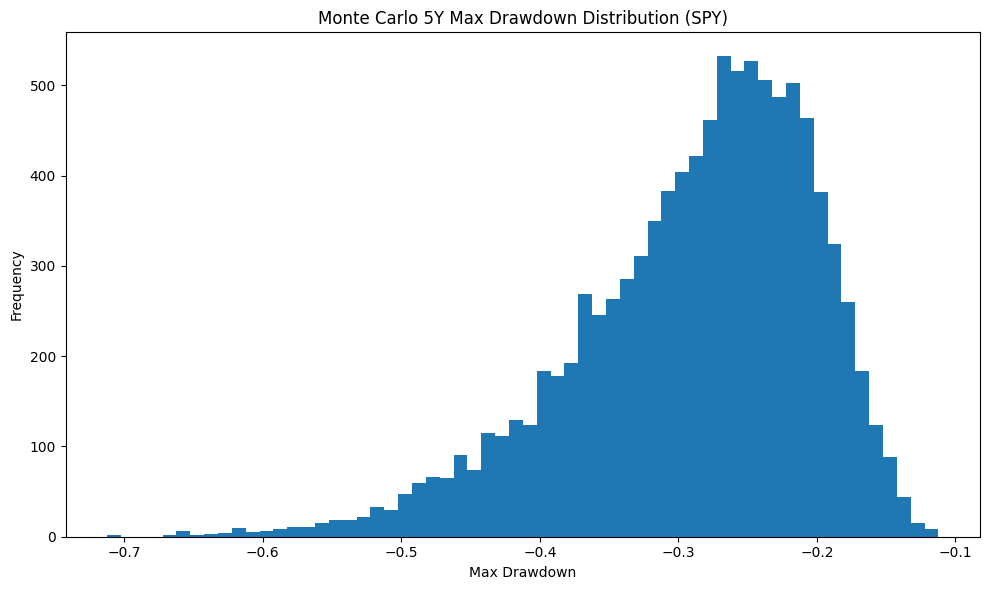

In [34]:
import matplotlib.pyplot as plt

t = "SPY"
plt.figure(figsize=(10,6))
plt.hist(mc_max_dd[t], bins=60)
plt.title(f"Monte Carlo 5Y Max Drawdown Distribution ({t})")
plt.xlabel("Max Drawdown")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


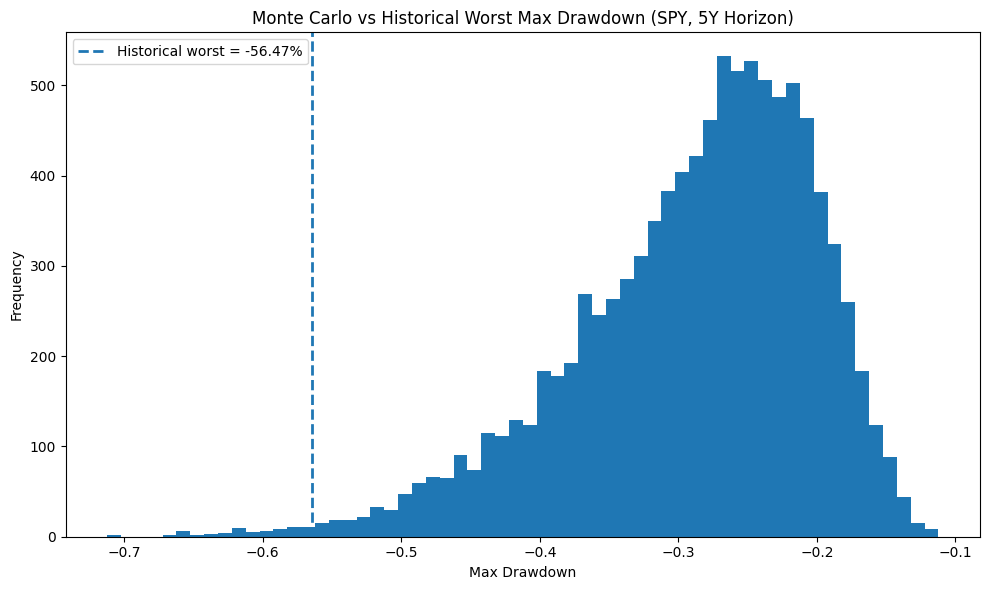

np.float64(-0.5647328750103537)

In [35]:
from src.risk import compute_drawdown

hist_dd = compute_drawdown(prices["SPY"].dropna())["drawdown"].min()

plt.figure(figsize=(10,6))
plt.hist(mc_max_dd["SPY"], bins=60)
plt.axvline(hist_dd, linewidth=2, linestyle="--", label=f"Historical worst = {hist_dd:.2%}")
plt.title("Monte Carlo vs Historical Worst Max Drawdown (SPY, 5Y Horizon)")
plt.xlabel("Max Drawdown")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

hist_dd


In [36]:
rows = []
for t in tickers:
    dd = mc_max_dd[t]
    rows.append({
        "ticker": t,
        "p01_max_dd": np.percentile(dd, 1),
        "p05_max_dd": np.percentile(dd, 5),
        "median_max_dd": np.percentile(dd, 50),
        "mean_max_dd": float(np.mean(dd)),
    })

mc_summary = pd.DataFrame(rows).sort_values("p05_max_dd")
mc_summary


,ticker,p01_max_dd,p05_max_dd,median_max_dd,mean_max_dd
2,IWM,-0.677004,-0.582115,-0.361070,-0.377677
3,TLT,-0.553453,-0.463015,-0.271505,-0.286378
1,QQQ,-0.549666,-0.457519,-0.281023,-0.296207
0,SPY,-0.543646,-0.456623,-0.273438,-0.288951
4,GLD,-0.492698,-0.410099,-0.244900,-0.258161


In [37]:
from pathlib import Path

Path("../outputs").mkdir(exist_ok=True)
mc_summary.to_csv("../outputs/mc_drawdown_summary.csv", index=False)


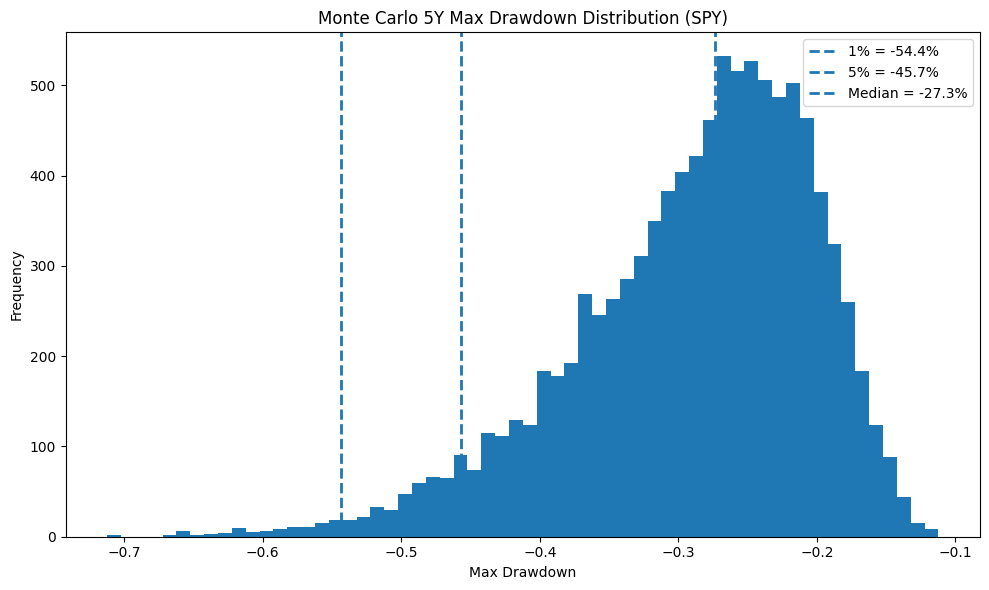

In [38]:
t = "SPY"
dd = mc_max_dd[t]

p1, p5, p50 = np.percentile(dd, [1, 5, 50])

plt.figure(figsize=(10,6))
plt.hist(dd, bins=60)
plt.axvline(p1, linestyle="--", linewidth=2, label=f"1% = {p1:.1%}")
plt.axvline(p5, linestyle="--", linewidth=2, label=f"5% = {p5:.1%}")
plt.axvline(p50, linestyle="--", linewidth=2, label=f"Median = {p50:.1%}")
plt.title(f"Monte Carlo 5Y Max Drawdown Distribution ({t})")
plt.xlabel("Max Drawdown")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()

Path("../figures").mkdir(exist_ok=True)
plt.savefig(f"../figures/mc_maxdd_dist_{t}.png", dpi=150)
plt.show()
